In [1]:
import pandas as pd
import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
import seaborn as sns
import statistics
%matplotlib inline

In [2]:
bias = 1.1661 # satellite has lower u10 values

read BUZM3 station data

In [3]:
buzm3_buoy = pd.read_csv("buzm3.csv")
buzm3_buoy.head()

,Date,WSPD
0,1/1/2014 0:00,7.3
1,1/1/2014 1:00,9.9
2,1/1/2014 2:00,12.8
3,1/1/2014 3:00,12.6
4,1/1/2014 4:00,11.3


In [4]:
# convert u_alt to u10 using power law
buzm3_buoy["u10_powerlaw"] = buzm3_buoy["WSPD"]*(10/24.8)**(1/7) 

In [5]:
# change dateformat
buzm3_buoy["Date"] = pd.to_datetime(buzm3_buoy["Date"])
buzm3_buoy.index = buzm3_buoy["Date"]
buzm3_buoy.head()

,Date,WSPD,u10_powerlaw
Date,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,7.3,6.411692
2014-01-01 01:00:00,2014-01-01 01:00:00,9.9,8.695308
2014-01-01 02:00:00,2014-01-01 02:00:00,12.8,11.242418
2014-01-01 03:00:00,2014-01-01 03:00:00,12.6,11.066755
2014-01-01 04:00:00,2014-01-01 04:00:00,11.3,9.924947


In [6]:
buzm3_buoy.describe()

,WSPD,u10_powerlaw
count,48453.000000,48453.000000
mean,7.819879,6.868309
std,3.784087,3.323616
min,0.000000,0.000000
25%,5.100000,4.479401
50%,7.400000,6.499523
75%,10.100000,8.870970
max,28.100000,24.680621


read taget area rp25 SARAL/AltiKa data

In [7]:
greenbox = pd.read_csv("target_rp25.csv")
greenbox.head()

,Unnamed: 0,Unnamed: 0.1,time,lon,lat,swh,wind_speed_alt
0,19,19,2014-08-26 10:19:13.157855040,288.723427,40.934677,1.097,1.84
1,20,20,2014-08-26 10:19:14.194844992,288.703035,40.995472,1.116,1.62
2,21,21,2014-08-26 10:19:16.268829120,288.662162,41.117052,1.019,2.02
3,22,22,2014-08-26 10:19:18.342813952,288.621170,41.238621,1.011,2.41
4,41,41,2014-09-03 23:19:19.884088064,288.662892,41.211967,0.685,3.15


In [8]:
greenbox["Date"] = greenbox["time"].apply(lambda x: x.split(".")[0])
greenbox["Date"] = pd.to_datetime(greenbox["Date"],format="%Y-%m-%d  %H:%M:%S")
greenbox.head()

,Unnamed: 0,Unnamed: 0.1,time,lon,lat,swh,wind_speed_alt,Date
0,19,19,2014-08-26 10:19:13.157855040,288.723427,40.934677,1.097,1.84,2014-08-26 10:19:13
1,20,20,2014-08-26 10:19:14.194844992,288.703035,40.995472,1.116,1.62,2014-08-26 10:19:14
2,21,21,2014-08-26 10:19:16.268829120,288.662162,41.117052,1.019,2.02,2014-08-26 10:19:16
3,22,22,2014-08-26 10:19:18.342813952,288.621170,41.238621,1.011,2.41,2014-08-26 10:19:18
4,41,41,2014-09-03 23:19:19.884088064,288.662892,41.211967,0.685,3.15,2014-09-03 23:19:19


In [9]:
# convert to hourly data
greenbox.index = greenbox['Date']
greenbox_hourly = greenbox.resample('H').mean()
greenbox_hourly.head()

,Unnamed: 0,Unnamed: 0.1,lon,lat,swh,wind_speed_alt
Date,,,,,,
2014-08-26 10:00:00,20.5,20.5,288.677448,41.071455,1.06075,1.9725
2014-08-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# clean data
greenbox_hourly = greenbox_hourly[["swh","wind_speed_alt"]]
greenbox_hourly = greenbox_hourly.dropna()
#buoy44097_rp25_hourly["Date1"] = buoy44097_rp25_hourly.index
greenbox = greenbox_hourly.reset_index(drop=True)
greenbox_hourly.head()

,swh,wind_speed_alt
Date,,
2014-08-26 10:00:00,1.060750,1.972500
2014-09-03 23:00:00,0.660667,3.233333
2014-09-30 10:00:00,0.748333,6.706667
2014-11-04 10:00:00,1.254667,5.963333
2014-11-12 23:00:00,0.858800,4.468000


In [11]:
greenbox_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-08-26 10:00:00 to 2019-12-16 10:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   swh             82 non-null     float64
 1   wind_speed_alt  82 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


Merge target area Rp25 SARAL/AltiKa and BUZM3 data

In [12]:
df = greenbox_hourly.join(buzm3_buoy,how="outer")
df.head()

,swh,wind_speed_alt,Date,WSPD,u10_powerlaw
Date,,,,,
2014-01-01 00:00:00,NaN,NaN,2014-01-01 00:00:00,7.3,6.411692
2014-01-01 01:00:00,NaN,NaN,2014-01-01 01:00:00,9.9,8.695308
2014-01-01 02:00:00,NaN,NaN,2014-01-01 02:00:00,12.8,11.242418
2014-01-01 03:00:00,NaN,NaN,2014-01-01 03:00:00,12.6,11.066755
2014-01-01 04:00:00,NaN,NaN,2014-01-01 04:00:00,11.3,9.924947


In [13]:
df = df.rename(columns={'wind_speed_alt':"target_rp25_u10",'u10_powerlaw':"BUZM3_u10"})
df = df[["target_rp25_u10","BUZM3_u10"]]
df.head()

,target_rp25_u10,BUZM3_u10
Date,,
2014-01-01 00:00:00,NaN,6.411692
2014-01-01 01:00:00,NaN,8.695308
2014-01-01 02:00:00,NaN,11.242418
2014-01-01 03:00:00,NaN,11.066755
2014-01-01 04:00:00,NaN,9.924947


In [14]:
df.describe()

,target_rp25_u10,BUZM3_u10
count,82.000000,48453.000000
mean,6.405870,6.868309
std,3.363429,3.323616
min,0.980000,0.000000
25%,4.145000,4.479401
50%,5.622333,6.499523
75%,7.940625,8.870970
max,16.593333,24.680621


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48461 entries, 2014-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_rp25_u10  82 non-null     float64
 1   BUZM3_u10        48453 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


merge data

In [16]:
x = df["target_rp25_u10"]
y = df["BUZM3_u10"]

In [17]:
df.describe()

,target_rp25_u10,BUZM3_u10
count,82.000000,48453.000000
mean,6.405870,6.868309
std,3.363429,3.323616
min,0.980000,0.000000
25%,4.145000,4.479401
50%,5.622333,6.499523
75%,7.940625,8.870970
max,16.593333,24.680621


In [18]:
X = x[~np.isnan(x)]

In [19]:
Y = y[~np.isnan(y)]

In [20]:
# add weibull fit to marginal histograms
from scipy.stats import weibull_min
shape1, loc1, scale1 = weibull_min.fit(X.values,floc=0) # fc is fixed shape
shape2, loc2, scale2 = weibull_min.fit(Y.values, fc=2,floc=0) # fc is fixed shape

In [21]:
mean1 = weibull_min.mean(c=shape1, loc=0, scale=scale1)
var1 = weibull_min.var(c=shape1, loc=0, scale=scale1)
mean1, var1

(6.427634868309059, 10.925634169505827)

In [22]:
mean2 = weibull_min.mean(c=shape2, loc=0, scale=scale2)
var2 = weibull_min.var(c=shape2, loc=0, scale=scale2)
mean2, var2

(6.765355956012468, 12.506185223154489)

In [23]:
# regression 
merged_xy = pd.concat([x, y], axis=1)
merged_xy = merged_xy.dropna()
merged_xy["target_rp25_u10_biascor"] = merged_xy["target_rp25_u10"].apply(lambda x: x+bias)
merged_xy.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2014-08-26 10:00:00 to 2019-12-16 10:00:00
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target_rp25_u10          74 non-null     float64
 1   BUZM3_u10                74 non-null     float64
 2   target_rp25_u10_biascor  74 non-null     float64
dtypes: float64(3)
memory usage: 2.3 KB


In [24]:
merged_xy

,target_rp25_u10,BUZM3_u10,target_rp25_u10_biascor
Date,,,
2014-08-26 10:00:00,1.972500,2.634942,3.138600
2014-09-03 23:00:00,3.233333,4.830726,4.399433
2014-09-30 10:00:00,6.706667,5.357715,7.872767
2014-11-04 10:00:00,5.963333,2.898436,7.129433
2014-11-12 23:00:00,4.468000,3.601087,5.634100
...,...,...,...
2019-01-07 10:00:00,13.365714,12.384226,14.531814
2019-01-23 10:00:00,9.597500,7.904825,10.763600
2019-08-21 23:00:00,7.028750,6.763017,8.194850


In [25]:
merged_xy.describe()

,target_rp25_u10,BUZM3_u10,target_rp25_u10_biascor
count,74.000000,74.000000,74.000000
mean,6.419444,6.745213,7.585544
std,3.400713,3.220870,3.400713
min,0.980000,1.053977,2.146100
25%,4.145000,4.479401,5.311100
50%,5.774000,6.587354,6.940100
75%,7.940625,8.431814,9.106725
max,16.593333,15.546156,17.759433


In [26]:
merged_xy.to_csv("merged_data.csv")

In [27]:
m, b = np.polyfit(merged_xy["target_rp25_u10"], merged_xy["BUZM3_u10"], 1)

In [28]:
m,b

(0.8128710625962333, 1.5270334022643235)

In [29]:
correlation_matrix = np.corrcoef(merged_xy["target_rp25_u10"], merged_xy["BUZM3_u10"])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.7366085748339091

In [30]:
merged_xy['y-x'] = merged_xy["BUZM3_u10"] - merged_xy["target_rp25_u10"]
merged_xy.describe()

,target_rp25_u10,BUZM3_u10,target_rp25_u10_biascor,y-x
count,74.000000,74.000000,74.000000,74.000000
mean,6.419444,6.745213,7.585544,0.325770
std,3.400713,3.220870,3.400713,1.771269
min,0.980000,1.053977,2.146100,-3.142529
25%,4.145000,4.479401,5.311100,-0.952844
50%,5.774000,6.587354,6.940100,0.171866
75%,7.940625,8.431814,9.106725,1.460124
max,16.593333,15.546156,17.759433,5.192732


In [31]:
# calculate slope and pearson r for bias corrected satellite data
m1, b1 = np.polyfit(merged_xy["target_rp25_u10_biascor"], merged_xy["BUZM3_u10"], 1)
m1,b1

(0.812871062596233, 0.5791444561708552)

In [32]:
correlation_matrix1 = np.corrcoef(merged_xy["target_rp25_u10_biascor"], merged_xy["BUZM3_u10"])
correlation_xy1 = correlation_matrix1[0,1]
r_squared1 = correlation_xy1**2
r_squared1

0.7366085748339087

In [33]:
merged_list1 = list(merged_xy["target_rp25_u10_biascor"])+list(merged_xy["BUZM3_u10"])

In [34]:
len(merged_list1)

148

In [35]:
np.mean(merged_list1)

7.165378571416214

In [36]:
X_bias_corrected = list(merged_xy["target_rp25_u10_biascor"])

Weibull fit after bias correction

In [37]:
shape3, loc3, scale3 = weibull_min.fit(merged_list1, fc=2,floc=0)
shape3, loc3, scale3

(2, 0, 7.895605468750015)

In [38]:
shape11, loc11, scale11 = weibull_min.fit(merged_xy["target_rp25_u10_biascor"], fc=2,floc=0)
shape11, loc11, scale11

(2, 0, 8.303515625000015)

In [39]:
mean1,mean2

(6.427634868309059, 6.765355956012468)

In [40]:
mean11 = weibull_min.mean(c=shape11, loc=0, scale=scale11)

In [41]:
mean11,mean2

(7.358799122792699, 6.765355956012468)

In [42]:
np.mean(merged_list1)

7.165378571416214

In [43]:
weibull_y = np.linspace(Y.min(), Y.max(), 50) # more smooth

Fig10b: weibull fit

Text(0.275, -0.03, 'B')

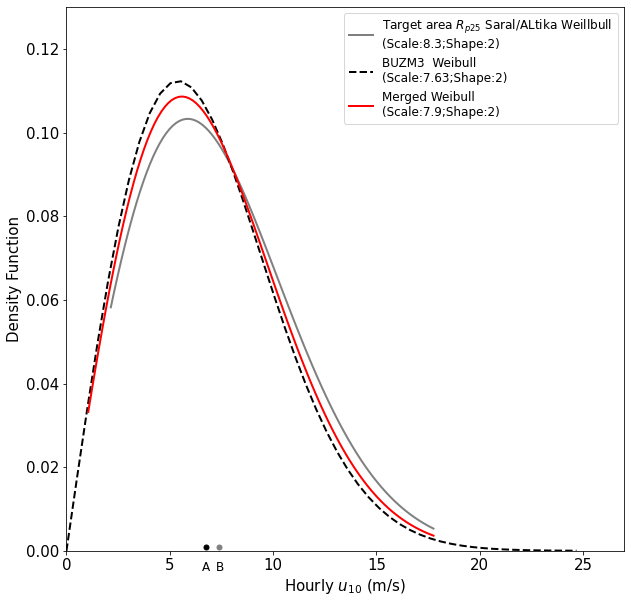

In [44]:
# after bias correction
fig, ax  = plt.subplots(figsize=(10,10))
weibull_merged = np.linspace(min(merged_list1), max(merged_list1), 100)
weibull_x = np.linspace(min(X_bias_corrected), max(X_bias_corrected), 100)
plt.plot(weibull_x,weibull_min(shape11, loc11, scale11).pdf(weibull_x),"grey",linewidth = 2, label="Target area " + "$R_{p25}$"+" Saral/ALtika"+" Weillbull \n(Scale:"+str(round(scale11,2))+";Shape:"+str(round(shape11,2))+")")
plt.plot(weibull_y,weibull_min(shape2, loc2, scale2).pdf(weibull_y),"k--",linewidth = 2,label="BUZM3 "+" Weibull \n(Scale:"+str(round(scale2,2))+";Shape:"+str(round(shape2,2))+")")
plt.plot(weibull_merged,weibull_min(shape3, loc3, scale3).pdf(weibull_merged),color="red",linewidth = 2,label="Merged Weibull "+"\n(Scale:"+str(round(scale3,2))+";Shape:"+str(round(shape3,2))+")")
plt.legend(fontsize=12,loc="upper right")
#plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)
ax.set_xlabel("Hourly $u_{10}$"+" (m/s)",fontsize=15)
ax.set_ylabel("Density Function",fontsize=15)
plt.ylim(0,0.13)
plt.xlim(0,27)
plt.plot(mean11,0.001,color='grey',marker="o",markersize=5)
plt.plot(mean2,0.001,color='black',marker="o",markersize=5)
plt.text(0.25,-0.03, 'A', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes,fontsize=12)
plt.text(0.275,-0.03, 'B', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes,fontsize=12)


Mean energy density

In [45]:
# parameters
air_density = 1.225 # kg/m^3

from scipy.special import gamma, factorial
def mean_energy_density(A,k):
    air_density = 1.225 # kg/m^3
    mean_energy_density = round(0.5*air_density*A**3*gamma(1+3/k),0)
    return mean_energy_density

In [46]:
print("Target Rp25", mean_energy_density(scale11,shape11), round(scale11,2),round(shape11,2))
print("BUZM3", mean_energy_density(scale2,shape2), round(scale2,2),round(shape2,2))
print("Merged", mean_energy_density(scale3,shape3), round(scale3,2),round(shape3,2))

Target Rp25 466.0 8.3 2
BUZM3 362.0 7.63 2
Merged 401.0 7.9 2


Fig10a: marginal histograms

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  figure: `.Figure`
  gid: str
  in_layout: bool
  label: str
  label1: str
  label2: str
  pad: float
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  transform: `.Transform`
  url: str
  visible: bool
  zorder: float
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  figure: `.Figure`
  gid: str
  in_layout: bool
  label: str
  label1: str
  label2: str
  pad: float
  path_

(0.0, 20.0)

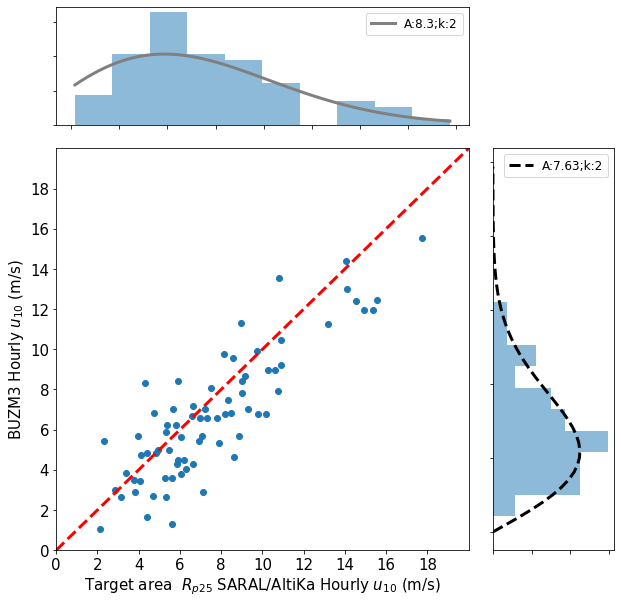

In [47]:
# after bias correction
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# x = np.random.rand(50)
# y = np.random.rand(50)

fig = plt.figure(figsize=(10,10))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

# start = 0 
# end = round(max(max(X),max(Y)))
ax_joint.scatter(merged_xy["target_rp25_u10_biascor"],merged_xy["BUZM3_u10"])
diag_x = np.linspace(0,20,len(X_bias_corrected))
#ax_joint.plot(reg_x,m*reg_x + b)
ax_joint.plot(diag_x,diag_x,'r--',linewidth=3)

reg_x = np.linspace(min(X_bias_corrected),max(X_bias_corrected),len(X_bias_corrected))
#ax_joint.plot(reg_x,m1*reg_x+b1,'blue',linewidth=3)

# plt.text(0.2, 0.9,'y = '+str(round(m,2))+'x' + " + "+str(round(b,2)), horizontalalignment='center',
#      verticalalignment='center',
#      transform=ax_joint.transAxes,fontsize=15)

# plt.text(0.1, 0.9,'Slope = '+str(round(m1,4)) + '\n $R^2$ = ' + str(round(r_squared1,4)), horizontalalignment='left',
#      verticalalignment='center',
#      transform=ax_joint.transAxes,fontsize=15)
# ax_joint.xaxis.set_ticks(range(0, end, 2))
# ax_joint.yaxis.set_ticks(range(0, end, 2))
ax_marg_x.hist(merged_xy["target_rp25_u10_biascor"],density=True,alpha=0.5)
ax_marg_y.hist(merged_xy["BUZM3_u10"],density=True,orientation="horizontal",alpha=0.5)

ax_marg_x.plot(weibull_x,weibull_min(shape11, loc11, scale11).pdf(weibull_x),color="grey",linewidth=3,label="A:"+str(round(scale11,2))+";k:"+str(round(shape11,2)))

# For horizontal plot, x y are inversed!!!!!!!
ax_marg_y.plot(weibull_min(shape2, loc2, scale2).pdf(weibull_y),weibull_y,"k--",linewidth=3,label="A:"+str(round(scale2,2))+";k:"+str(round(shape2,2)))
ax_marg_x.legend(fontsize=12)
ax_marg_y.legend(fontsize=12)
# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)
plt.setp(ax_marg_x.get_yticklabels(), visible=False)
plt.setp(ax_marg_y.get_xticklabels(), visible=False)

# Set 
plt.setp(ax_joint.xaxis.set_ticks(range(0, 20, 2)))
plt.setp(ax_joint.xaxis.set_ticks(range(0, 20, 2)))
plt.setp(ax_joint.yaxis.set_ticks(range(0, 20, 2)))

plt.setp(ax_joint.get_xticklabels(), fontsize=15)
plt.setp(ax_joint.get_yticklabels(), fontsize=15)
# Set labels on joint
ax_joint.set_xlabel("Target area  " + "$R_{p25}$ "+"SARAL/AltiKa Hourly "+"$u_{10}$"+" (m/s)",fontsize=15)
ax_joint.set_ylabel('BUZM3 Hourly '+"$u_{10}$"+" (m/s)",fontsize=15)

ax_joint.set_xlim(0,20)
ax_joint.set_ylim(0,20)


wind power

In [48]:
ref_wind = pd.read_csv("92671-2012.csv",skiprows=3)

In [49]:
# extract parameters
min_max_scaler = preprocessing.MinMaxScaler()
power = ref_wind[['power (MW)']].values.astype(float)
power_scaled = min_max_scaler.fit_transform(power)
ref_wind["power_scaled"] = power_scaled
w25 = round(statistics.mean(ref_wind["wind speed at 100m (m/s)"].loc[ref_wind["power_scaled"] == 0.25]),2)
w75 = round(statistics.mean(ref_wind["wind speed at 100m (m/s)"].loc[ref_wind["power_scaled"] == 0.75]),2)
cutin = max(ref_wind["wind speed at 100m (m/s)"].loc[(ref_wind["wind speed at 100m (m/s)"]<10) &
                                                                       (ref_wind["power_scaled"]==0)])
cutoff = round(max(ref_wind["wind speed at 100m (m/s)"].loc[ref_wind["power_scaled"]==1]),2)

print("cutin wind speed:", cutin)
print("cutoff wind speed:", cutoff)
print("the wind speed where power speed is 25% of power:", w25)
print("the wind speed where power speed is 75% of power:", w75)

cutin wind speed: 2.139
cutoff wind speed: 26.14
the wind speed where power speed is 25% of power: 6.76
the wind speed where power speed is 75% of power: 9.87


In [50]:
# convert wind speed to wind power
def curve_function(x):
    y = (1/2 * (1-math.tanh((x - (w25+w75)/2)/((w25-w75)/math.log(3)))))
    return y

df["avg_u10"] = (df["target_rp25_u10"] + df["BUZM3_u10"])/2
df["avg_u10"] = df["avg_u10"].where(df['avg_u10']==np.nan, df['BUZM3_u10'])
# convert u10m to u100m
alpha = 1/7
df["u100"] =  df["avg_u10"].apply(lambda x: x* (100/10)**alpha)

df["predicted_power"] = df["u100"].apply(lambda x: curve_function(x) if cutin<x<cutoff else 0)
df["predicted_power"] = df["predicted_power"]*100
df.head()

,target_rp25_u10,BUZM3_u10,avg_u10,u100,predicted_power
Date,,,,,
2014-01-01 00:00:00,NaN,6.411692,6.411692,8.909016,60.340535
2014-01-01 01:00:00,NaN,8.695308,8.695308,12.082091,93.471390
2014-01-01 02:00:00,NaN,11.242418,11.242418,15.621289,99.430194
2014-01-01 03:00:00,NaN,11.066755,11.066755,15.377207,99.323678
2014-01-01 04:00:00,NaN,9.924947,9.924947,13.790669,97.953932


Fig11: wind power curve

Text(0, 0.5, 'Power Output Capacity (%)')

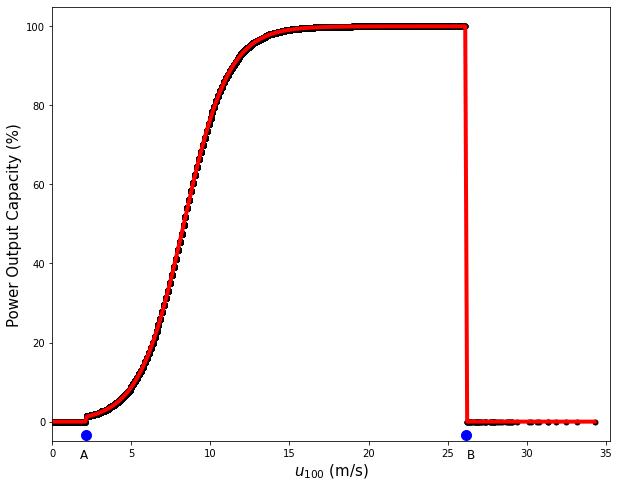

In [51]:
df = df.sort_values(by='u100')
# plot u100 vs predicted generated power (standardized)
x = df["u100"]
y = df["predicted_power"]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x,y,'ko',markersize=5)
plt.plot(x,y,'r-',linewidth=4)
plt.plot(cutin,curve_function(cutin)-3.5,'bo',markersize=10)
plt.plot(cutoff,0-3.5,'bo',markersize=10)


#plt.plot(cutin, curve_function(cutin)+10, marker=r'$\downarrow$',markersize=20,color="blue",linewidth=3)
plt.text(0.05,-0.03, 'A', horizontalalignment='left',
    verticalalignment='center', transform=ax.transAxes,fontsize=12)
#plt.plot(cutoff+1, 100, marker=r'$\leftarrow$',markersize=20,color="blue",linewidth=3)
plt.text(0.75,-0.03, 'B', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes,fontsize=12)

plt.ylim(-5,105)
plt.xlim(0,max(x)+1)
plt.xlabel("$u_{100}$"+ " (m/s)",size=15)
plt.ylabel("Power Output Capacity (%)",size=15)

wind power heat map for Target area Rp25 SARAL/AltiKa

In [52]:
greenbox_hourly['Date'] = pd.to_datetime(greenbox_hourly.index)
greenbox_hourly['month'] = greenbox_hourly['Date'].dt.month_name()
greenbox_hourly['month'] = greenbox_hourly['month'].apply(lambda x: x[:3])
greenbox_hourly['day'] = greenbox_hourly['Date'].dt.day_name()
greenbox_hourly['hour']=greenbox_hourly['Date'].dt.hour
greenbox_hourly

,swh,wind_speed_alt,Date,month,day,hour
Date,,,,,,
2014-08-26 10:00:00,1.060750,1.972500,2014-08-26 10:00:00,Aug,Tuesday,10
2014-09-03 23:00:00,0.660667,3.233333,2014-09-03 23:00:00,Sep,Wednesday,23
2014-09-30 10:00:00,0.748333,6.706667,2014-09-30 10:00:00,Sep,Tuesday,10
2014-11-04 10:00:00,1.254667,5.963333,2014-11-04 10:00:00,Nov,Tuesday,10
2014-11-12 23:00:00,0.858800,4.468000,2014-11-12 23:00:00,Nov,Wednesday,23
...,...,...,...,...,...,...
2019-06-13 10:00:00,0.852750,9.777500,2019-06-13 10:00:00,Jun,Thursday,10
2019-08-05 23:00:00,0.846750,3.815000,2019-08-05 23:00:00,Aug,Monday,23
2019-08-21 23:00:00,1.190250,7.028750,2019-08-21 23:00:00,Aug,Wednesday,23


In [53]:
# convert u10m to u100m
alpha = 1/7
cutin = 2.14
cutoff= 26.14
w25 = 6.76
w75 = 9.87
greenbox_hourly["u100"] = greenbox_hourly["wind_speed_alt"].apply(lambda x: x* (100/10)**alpha)
greenbox_hourly["predicted_power"] =greenbox_hourly["u100"].apply(lambda x: curve_function(x) if cutin<x<cutoff else 0)
greenbox_hourly["predicted_power"] = greenbox_hourly["predicted_power"]*100
greenbox_hourly.head()

,swh,wind_speed_alt,Date,month,day,hour,u100,predicted_power
Date,,,,,,,,
2014-08-26 10:00:00,1.060750,1.972500,2014-08-26 10:00:00,Aug,Tuesday,10,2.740780,1.911084
2014-09-03 23:00:00,0.660667,3.233333,2014-09-03 23:00:00,Sep,Wednesday,23,4.492702,6.294590
2014-09-30 10:00:00,0.748333,6.706667,2014-09-30 10:00:00,Sep,Tuesday,10,9.318883,67.023462
2014-11-04 10:00:00,1.254667,5.963333,2014-11-04 10:00:00,Nov,Tuesday,10,8.286025,49.488239
2014-11-12 23:00:00,0.858800,4.468000,2014-11-12 23:00:00,Nov,Wednesday,23,6.208266,18.415987


In [54]:
res = greenbox_hourly[['Date', 'predicted_power', 'month', 'day',
       'hour']]

df1 = res.groupby(['month', 'hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,month,hour,mean
0,Aug,10,26.403574
1,Sep,23,22.780757
2,Sep,10,56.733325
3,Nov,10,64.146283
4,Nov,23,69.121476


In [55]:
def month2season(x):
    if x in ["Dec","Jan","Feb"]:
        return "Winter"
    elif x in ["Mar","Apr","May"]:
        return "Spring"
    elif x in ["Jun","Jul","Aug"]:
        return "Summer"
    else:
        return "Autumn"

In [56]:
df2 = res.copy()
df2["season"] = df2["month"].apply(lambda x: month2season(x))
df2 = df2.groupby(['season', 'hour'],sort=False).agg(['mean'])
df2.columns=df2.columns.droplevel(0)
df2.reset_index(inplace=True)
df2.head()

,season,hour,mean
0,Summer,10,50.722511
1,Autumn,23,54.875849
2,Autumn,10,55.158622
3,Winter,10,66.196290
4,Winter,23,50.304711


In [57]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df2, values='mean', index=['season'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

hour           10         23
season                      
Autumn  55.158622  54.875849
Spring  52.056549  39.508879
Summer  50.722511  23.951275


In [58]:
seasons = ["Winter","Spring","Summer","Autumn"]
heatmap_data=heatmap_data.loc[seasons]

In [59]:
heatmap_data

hour,10,23
season,,
Winter,66.196290,50.304711
Spring,52.056549,39.508879
Summer,50.722511,23.951275
Autumn,55.158622,54.875849


In [60]:
heatmap_data1 = heatmap_data.copy()
for col in [0,1,2,3,4,5,6,7,8,
               9,11,12,13,14,15,16,
               17,18,19,20,21,22]:
    heatmap_data1[col] = np.nan 
heatmap_data1

hour,10,23,0,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,21,22
season,,,,,,,,,,,,,,,,,,,,,
Winter,66.196290,50.304711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spring,52.056549,39.508879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summer,50.722511,23.951275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Autumn,55.158622,54.875849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
heatmap_data1.columns

Int64Index([10, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22],
           dtype='int64', name='hour')

In [62]:
heatmap_data1 = heatmap_data1[[0,1,2,3,4,5,6,7,8,
               9,10,11,12,13,14,15,16,
               17,18,19,20,21,22,23]]

In [63]:
hour_list = [ 1,  4,  7, 10, 13, 16, 19, 22, 23]
heatmap_data2 = heatmap_data1.iloc[:,hour_list]

Fig12b: wind power heat map

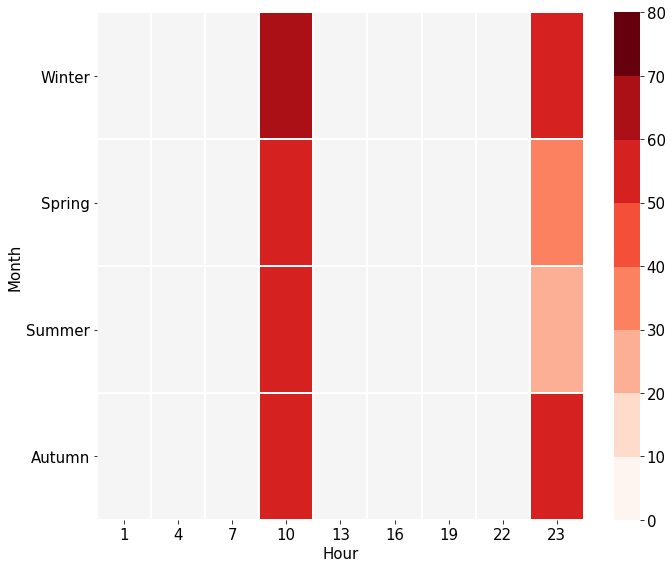

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(heatmap_data2,linecolor='white',linewidths=1,cmap=plt.cm.get_cmap('Reds',8 ),vmin=0,vmax=80)
plt.xlabel("Hour", size=15)
plt.ylabel("Month", size=15)

#plt.title("Buoy 44017 Estimated Wind Power Capacity (%)", size=14)

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
ax.set_facecolor('whitesmoke')

wind power heat map for BUZM3

In [65]:
df['Date'] = pd.to_datetime(df.index)
df['month'] = df['Date'].dt.month_name()
df['month'] = df['month'].apply(lambda x: x[:3])
df['day'] = df['Date'].dt.day_name()
df['hour']=df['Date'].dt.hour

In [66]:
res1 = df[['Date', 'predicted_power', 'month', 'day',
       'hour']]

df3 = res1.groupby(['month', 'hour'],sort=False).agg(['mean'])
df3.columns=df3.columns.droplevel(0)
df3.reset_index(inplace=True)
df3

,month,hour,mean
0,Sep,15,44.659998
1,Apr,5,54.908802
2,Aug,11,32.549107
3,Jul,5,34.362840
4,May,9,45.437328
...,...,...,...
283,Jul,21,52.617578
284,Jan,4,74.250721
285,Feb,6,64.590838
286,Oct,0,66.105909


In [67]:
df4 = res1.copy()
df4["season"] = df4["month"].apply(lambda x: month2season(x))
df4 = df4.groupby(['season', 'hour'],sort=False).agg(['mean'])
df4.columns=df4.columns.droplevel(0)
df4.reset_index(inplace=True)
df4

,season,hour,mean
0,Autumn,15,55.286693
1,Spring,5,53.872484
2,Summer,11,35.221886
3,Summer,5,36.035997
4,Spring,9,53.864337
...,...,...,...
91,Summer,18,44.563226
92,Winter,4,69.820732
93,Spring,19,60.202955
94,Summer,22,52.153255


In [68]:
# pandas pivot with multiple variables
heatmap_data3 = pd.pivot_table(df4, values='mean', index=['season'], columns='hour')
# print to see few rows and columns
print(heatmap_data3.iloc[0:3, 0:3])

hour            0          1          2
season                                 
Autumn  62.211980  60.787431  60.647697
Spring  60.596964  57.636216  57.313597
Summer  47.956895  45.146718  41.889087


In [69]:
seasons = ["Winter","Spring","Summer","Autumn"]
heatmap_data3=heatmap_data3.loc[seasons]
hour_list = [ 1,  4,  7, 10, 13, 16, 19, 22, 23]
heatmap_data4 = heatmap_data3.iloc[:,hour_list]

Fig12a: wind power heat map

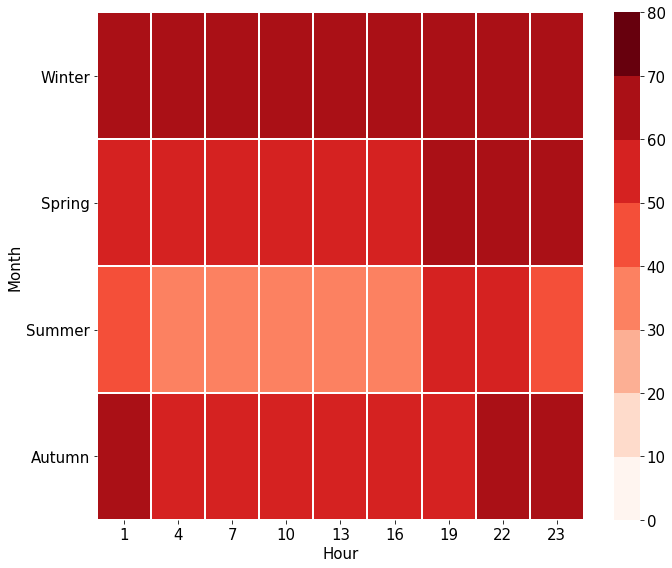

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(heatmap_data4, linecolor='white',linewidths=1,cmap=plt.cm.get_cmap('Reds',8 ),vmin=0,vmax=80)
plt.xlabel("Hour", size=15)
plt.ylabel("Month", size=15)

#plt.title("Buoy 44017 Estimated Wind Power Capacity (%)", size=14)

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()